In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import pandas as pd

df = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
df_trks = pd.read_csv("https://api.vitaldb.net/trks")  # track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

In [7]:
df

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [8]:
df_labs.to_csv("labs.csv")

In [9]:
sum(df.loc[:,"death_inhosp"] == 1)

57

In [10]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['sex', 'department', 'optype', 'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_ecg', 'preop_pft', 'cormack', 'airway', 'dltubesize', 'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2']


In [11]:
df[object_cols]

,sex,department,optype,dx,opname,approach,position,ane_type,preop_ecg,preop_pft,cormack,airway,dltubesize,iv1,iv2,aline1,aline2,cline1,cline2
0,M,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,Normal Sinus Rhythm,Normal,I,Oral,NaN,Right forearm,NaN,Left radial,NaN,NaN,NaN
1,M,General surgery,Stomach,Advanced gastric cancer,Subtotal gastrectomy,Open,Supine,General,Normal Sinus Rhythm,Normal,I,Oral,NaN,Left forearm,NaN,NaN,NaN,NaN,NaN
2,M,General surgery,Biliary/Pancreas,Gallbladder stone,Cholecystectomy,Videoscopic,Reverse Trendelenburg,General,Normal Sinus Rhythm,Normal,I,Oral,NaN,Left forearm,NaN,NaN,NaN,NaN,NaN
3,M,General surgery,Stomach,Advanced gastric cancer,Distal gastrectomy,Videoscopic,Reverse Trendelenburg,General,Normal Sinus Rhythm,Normal,I,Oral,NaN,Left forearm,NaN,Right radial,NaN,NaN,NaN
4,M,General surgery,Vascular,Aortic aneurysm,Aneurysmal repair,Open,Prone,General,Left anterior fascicular block,Normal,I,Oral,NaN,Right forearm,NaN,Right radial,NaN,Right IJV,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,M,General surgery,Stomach,Advanced gastric cancer,Total gastrectomy,Open,Supine,General,Normal Sinus Rhythm,Normal,I,Oral,NaN,Left forearm,NaN,NaN,NaN,NaN,NaN
6384,M,General surgery,Colorectal,"Colon submucosal tumor, unknown behavior",Ultralow anterior resection,Videoscopic,Lithotomy,General,Normal Sinus Rhythm,Normal,NaN,NaN,NaN,Right forearm,Left forearm,Right radial,NaN,NaN,NaN
6385,F,General surgery,Stomach,Early gastric cancer,Distal gastrectomy,Videoscopic,Supine,General,Normal Sinus Rhythm,Normal,I,Oral,NaN,Left forearm,NaN,Right radial,NaN,NaN,NaN
6386,F,General surgery,Biliary/Pancreas,Common bile duct stone without obstruction,Choledochal cyst excision,Robotic,Supine,General,Normal Sinus Rhythm,Normal,I,Oral,NaN,Right forearm,Left forearm,Left radial,NaN,NaN,NaN


In [12]:
num = df.select_dtypes(exclude=["object"])

In [13]:
num

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If 
your data deals with multiple classes, you can take any two classes. Steps below (refer below 
diagram for understanding):

• Calculate the mean for each class (also called as class centroid)
(Suggestion: You may use numpy.mean() function for finding the average vector for all 
vectors in a given class. Please define the axis property appropriately to use this function. EX: 
feat_vecs.mean(axis=0))

• Calculate spread (standard deviation) for each class
(Suggestion: You may use numpy.std() function for finding the standard deviation vector 
for all vectors in a given class. Please define the axis property appropriately to use this 
function.)

• Calculate the distance between mean vectors between classes
(Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean 
distance between two centroids.)


In [53]:
height_centroid = num["height"].mean(axis=0)
weight_centroid = num["weight"].mean(axis=0)
(height_centroid,weight_centroid)

(162.18883218534754, 61.48492172824045)

In [54]:
height_spread = num["height"].std(axis=0)
weight_spread = num["weight"].std(axis=0)
(height_spread,weight_spread)

(9.905329381829445, 11.945135390835063)

In [16]:
distance=np.linalg.norm(height_centroid - weight_centroid)
distance

100.70391045710709

A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the 
histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and 
variance from the available data. 

In [17]:
import matplotlib as plt

(array([[ 7.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([2.0000e+00, 3.3950e+02, 6.7700e+02, 1.0145e+03, 1.3520e+03,
        1.6895e+03, 2.0270e+03, 2.3645e+03, 2.7020e+03, 3.0395e+03,
        3.3770e+03]),
 <a list of 2 BarContainer objects>)

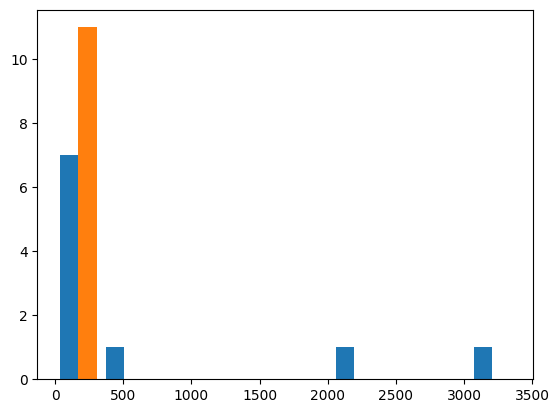

In [18]:
data=np.histogram(num["height"])

plt.pyplot.hist(data)

A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 
to 10. Make a plot of the distance and observe the nature of this graph.

In [19]:
def minkowski_distance(a, b, r):
    return np.sum(np.abs(a - b)**r)**(1/r)

In [20]:
distances=[]
for i in range(1,11):
    t1=minkowski_distance(num["height"],num["weight"],i)
    distances.append(t1)

In [21]:
distances

[643296.58,
 8088.415577441604,
 1886.454031598066,
 912.9502003734399,
 591.5852953782303,
 443.55579431959256,
 361.4671708128566,
 310.31046299288516,
 275.7951991644556,
 251.13910184825633]

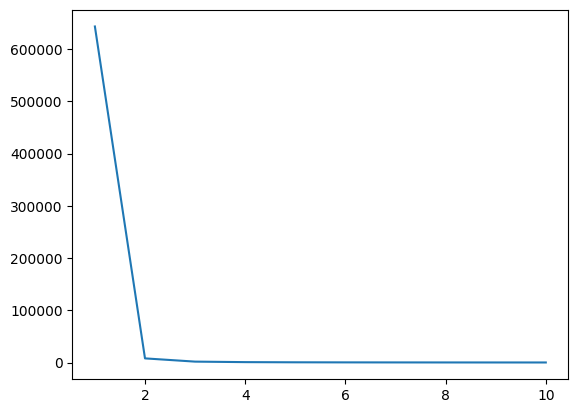

In [22]:
plt.pyplot.plot([i for i in range(1,11)],distances)

A4. Divide dataset in your project into two parts – train and test set. To accomplish this, use the train.test_split() function available in SciKit.

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
object_cols

['sex',
 'department',
 'optype',
 'dx',
 'opname',
 'approach',
 'position',
 'ane_type',
 'preop_ecg',
 'preop_pft',
 'cormack',
 'airway',
 'dltubesize',
 'iv1',
 'iv2',
 'aline1',
 'aline2',
 'cline1',
 'cline2']

In [25]:
df_cases = df.copy()

In [26]:
df = df.drop(object_cols,axis=1)

In [27]:
df = df.dropna(how="all")

In [28]:
df = df.astype(float)

In [29]:
y = df['death_inhosp'].values.flatten()
df = df.drop(['death_inhosp','caseid','subjectid','icu_days','casestart','caseend','anestart','aneend','opstart','opend','adm','dis'], axis=1)


In [30]:
x = df.values
df.columns

Index(['age', 'height', 'weight', 'bmi', 'asa', 'emop', 'preop_htn',
       'preop_dm', 'preop_hb', 'preop_plt', 'preop_pt', 'preop_aptt',
       'preop_na', 'preop_k', 'preop_gluc', 'preop_alb', 'preop_ast',
       'preop_alt', 'preop_bun', 'preop_cr', 'preop_ph', 'preop_hco3',
       'preop_be', 'preop_pao2', 'preop_paco2', 'preop_sao2', 'tubesize',
       'lmasize', 'intraop_ebl', 'intraop_uo', 'intraop_rbc', 'intraop_ffp',
       'intraop_crystalloid', 'intraop_colloid', 'intraop_ppf', 'intraop_mdz',
       'intraop_ftn', 'intraop_rocu', 'intraop_vecu', 'intraop_eph',
       'intraop_phe', 'intraop_epi', 'intraop_ca'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.3)

A5. Train a kNN classifier (k =3) using the training set obtained from above exercise. Following code 
for help:


In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
neigh =KNeighborsClassifier(n_neighbors=3)

In [34]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_x_train = pd.DataFrame(my_imputer.fit_transform(x_train))
imputed_x_train.columns = x_train.columns
imputed_x_test = pd.DataFrame(my_imputer.transform(x_test))
imputed_x_test.columns = x_test.columns

In [35]:
neigh.fit(imputed_x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

A6. Test the accuracy of the kNN using the test set obtained from above exercise. Following code for 
help

In [36]:
k3 = neigh.score(imputed_x_test, y_test);k3

0.9932185706833594

A7. Use the predict() function to study the prediction behavior of the classifier for test vectors.

In [37]:
neigh.predict(imputed_x_test)

array([0., 0., 0., ..., 0., 0., 0.])

A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 
11 and make an accuracy plot.

In [38]:
neigh =KNeighborsClassifier(n_neighbors=1)

In [39]:
neigh.fit(imputed_x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
k1= neigh.score(imputed_x_test, y_test);k1

0.989567031820553

In [41]:
k3 - k1

0.003651538862806447

In [51]:
acc=[]
for i in range(1,11):
    neigh =KNeighborsClassifier(n_neighbors=i)
    neigh.fit(imputed_x_train,y_train)
    acc.append(neigh.score(imputed_x_test, y_test))

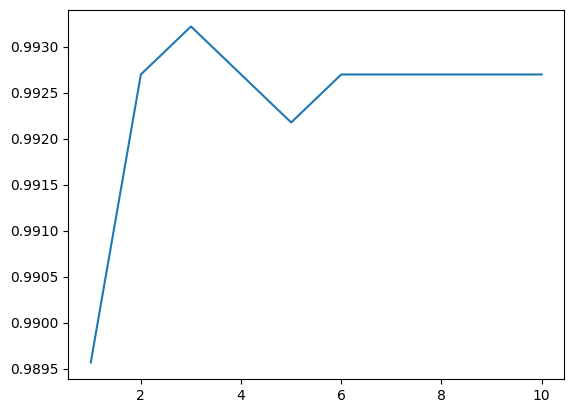

In [52]:
plt.pyplot.plot([i for i in range(1,11)],acc)

A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the 
other performance metrics such as precision, recall and F1-Score measures for both training and test 
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [70]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [86]:
cm_y_train = neigh.predict(imputed_x_train)
cm_y_test = neigh.predict(imputed_x_test)
cm_train = confusion_matrix(y_train,cm_y_train)
cm_test = confusion_matrix(y_test,cm_y_test)

In [87]:
cm_y_train = neigh.predict(imputed_x_train)
cm_train = confusion_matrix(y_train,cm_y_train)

In [90]:
cm_train

array([[4428,    0],
       [  43,    0]])

In [91]:
cm_test

array([[1903,    0],
       [  14,    0]])

In [97]:
precision_train = precision_score(y_train, cm_y_train,average="weighted" )
recall_train = recall_score(y_train, cm_y_train,average="weighted" )
f1_train = f1_score(y_train, cm_y_train,average="weighted" )

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
precision_train,recall_train,f1_train

(0.9808574265298058, 0.9903824647729814, 0.9855969331418726)

In [98]:
precision_test = precision_score(y_test, cm_y_test, average="weighted")
recall_test = recall_score(y_test, cm_y_test,average="weighted" )
f1_test = f1_score(y_test, cm_y_test, average="weighted")

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
precision_test,recall_test,f1_test

(0.9854471794930405, 0.9926969222743871, 0.9890587660147429)

We can infer the model's learning outcome to be overfit due to high accuracy scores and the class imbalance